<a href="https://colab.research.google.com/github/prikmm/MLprojects/blob/main/notebooks/tf_Data_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras, data
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
X = tf.range(10)
dataset = data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [3]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [4]:
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [5]:
dataset = dataset.map(lambda x: x * 2)
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [6]:
dataset = dataset.apply(data.experimental.unbatch())
for item in dataset:
    print(item)

Instructions for updating:
Use `tf.data.Dataset.unbatch()`.
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=

In [7]:
dataset = dataset.filter(lambda x: x < 10)
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [8]:
for item in dataset.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


## Shuffling Data:

In [9]:
dataset = tf.data.Dataset.range(10).repeat(3)
dataset = dataset.shuffle(buffer_size=5, seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 2 3 6 7 9 4], shape=(7,), dtype=int64)
tf.Tensor([5 0 1 1 8 6 5], shape=(7,), dtype=int64)
tf.Tensor([4 8 7 1 2 3 0], shape=(7,), dtype=int64)
tf.Tensor([5 4 2 7 8 9 9], shape=(7,), dtype=int64)
tf.Tensor([3 6], shape=(2,), dtype=int64)


In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

In [11]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [12]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

In [13]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


In [14]:
with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(), end="")

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [15]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

In [16]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [17]:
for filepath in filepath_dataset:
    print(filepath)

n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers
)

tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Ten

In [18]:
for line in dataset.take(5):
    print(line)

tf.Tensor(b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418', shape=(), dtype=string)
tf.Tensor(b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0', shape=(), dtype=string)
tf.Tensor(b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67', shape=(), dtype=string)
tf.Tensor(b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205', shape=(), dtype=string)
tf.Tensor(b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215', shape=(), dtype=string)


In [19]:
n_inputs = 8

@tf.function
def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

In [20]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

In [21]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5, n_read_threads=None,
                       shuffle_buffer_size=10000, n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_parse_threads
    )
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.shuffle(shuffle_buffer_size).repeat(repeat)
    return dataset.batch(batch_size).prefetch(1)

In [22]:
train_set = csv_reader_dataset(train_filepaths)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(1)
])

In [24]:
model.compile(loss="mse",
              optimizer=keras.optimizers.Nadam(lr=1e-3),
              metrics=["mse"])

In [25]:
model.fit(train_set, epochs=10, validation_data=valid_set)

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 6.1856 - mse: 6.1856 - val_loss: 11.1908 - val_mse: 11.1908
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6923 - mse: 0.6923 - val_loss: 2.6691 - val_mse: 2.6691
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5240 - mse: 0.5240 - val_loss: 1.0652 - val_mse: 1.0652
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4512 - mse: 0.4512 - val_loss: 0.5830 - val_mse: 0.5830
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4275 - mse: 0.4275 - val_loss: 0.5127 - val_mse: 0.5127
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4333 - mse: 0.4333 - val_loss: 0.5936 - val_mse: 0.5936
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4192 - mse: 0.4192 - val_loss: 0.4103 - val_mse: 0.4103
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 

In [26]:
model.evaluate(test_set)
new_set = test_set.take(3).map(lambda X, y: X)
model.predict(new_set).shape

162/162 [==============================] - 0s 902us/step - loss: 0.4035 - mse: 0.4035


(96, 1)

In [27]:
n_epochs = 5
optimizer = keras.optimizers.Nadam(lr=1e-4)
loss_fn = keras.losses.MeanAbsoluteError()

@tf.function
def train(model, optimizer, loss_fn, n_epochs):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs)
    for X_batch, y_batch in train_set:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss], model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [28]:
train(model, optimizer, loss_fn, n_epochs)

In [29]:
model.evaluate(test_set)

162/162 [==============================] - 0s 904us/step - loss: 0.4080 - mse: 0.4080


[0.4079751670360565, 0.4079751670360565]

## TFRecords:

In [30]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [31]:
filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


In [32]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed_TFRecordFile", options) as f:
    f.write(b"My first tfrecord compressed file")
    f.write(b"My second line in compressed file")

In [33]:
dataset = tf.data.TFRecordDataset("my_compressed_TFRecordFile",
                                  compression_type="GZIP")

for item in dataset:
    print(item)

tf.Tensor(b'My first tfrecord compressed file', shape=(), dtype=string)
tf.Tensor(b'My second line in compressed file', shape=(), dtype=string)


### Protocol Buffers:

In [34]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Writing person.proto


In [35]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [36]:
!ls person*

person.desc  person_pb2.py  person.proto


In [37]:
from person_pb2 import Person

In [38]:
person = Person(name="Al", id=123, email=["a@b.com"])
print(person)

name: "Al"
id: 123
email: "a@b.com"



In [39]:
person.name

'Al'

In [40]:
person.name = "Alice"

In [41]:
person.email[0]

'a@b.com'

In [42]:
person.email.append("c@d.com")
person.email

['a@b.com', 'c@d.com']

In [43]:
print(person)

name: "Alice"
id: 123
email: "a@b.com"
email: "c@d.com"



In [44]:
s = person.SerializeToString()
s

b'\n\x05Alice\x10{\x1a\x07a@b.com\x1a\x07c@d.com'

In [45]:
person2 = Person()
person2.ParseFromString(s)

27

In [46]:
person == person2

True

### TensorFlow Protocol Buffers:

#### Example ProtoBuf:

In [47]:
"""
syntax = "proto3";
message BytesList { repeated bytes value = 1; }
message FloatList { repeated float value = 1 [packed_value = true]; }
message Int64List { repeated int64 value = 1 [packed_value = true]; }
message Feature {
    oneof kind {
        BytesList bytes_list = 1;
        FloatList float_list = 2;
        Int64List int_list = 3
    }
};

message Features { map<string, Feature> feature = 1; };
message Example { Features features = 1; };
"""

'\nsyntax = "proto3";\nmessage BytesList { repeated bytes value = 1; }\nmessage FloatList { repeated float value = 1 [packed_value = true]; }\nmessage Int64List { repeated int64 value = 1 [packed_value = true]; }\nmessage Feature {\n    oneof kind {\n        BytesList bytes_list = 1;\n        FloatList float_list = 2;\n        Int64List int_list = 3\n    }\n};\n\nmessage Features { map<string, Feature> feature = 1; };\nmessage Example { Features features = 1; };\n'

In [48]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com",
                                                      b"c@d.com"]))
        }
    )
)

In [49]:
print(person_example)

features {
  feature {
    key: "emails"
    value {
      bytes_list {
        value: "a@b.com"
        value: "c@d.com"
      }
    }
  }
  feature {
    key: "id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "name"
    value {
      bytes_list {
        value: "Alice"
      }
    }
  }
}



In [50]:
with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    f.write(person_example.SerializeToString())

In [51]:
dataset = tf.data.TFRecordDataset("my_contacts.tfrecord")
for item in dataset:
    print(item)

tf.Tensor(b'\n@\n\x0b\n\x02id\x12\x05\x1a\x03\n\x01{\n\x1e\n\x06emails\x12\x14\n\x12\n\x07a@b.com\n\x07c@d.com\n\x11\n\x04name\x12\t\n\x07\n\x05Alice', shape=(), dtype=string)


In [52]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}

In [53]:
for serialized_example in tf.data.TFRecordDataset("my_contacts.tfrecord"):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)

In [54]:
parsed_example

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7f65966742e8>,
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}

In [55]:
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [56]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [57]:
dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(10)
for serialized_examples in dataset:
    parsed_examples = tf.io.parse_example(serialized_examples,
                                          feature_description)

In [58]:
parsed_examples

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7f658d16d400>,
 'id': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([123])>,
 'name': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Alice'], dtype=object)>}

#### SequenceExample Protobuf:

In [59]:
"""
message FeatureList { repeated Feature feature = 1; }
message FeatureLists { map<string, FeatureList> feature_list = 1; }
message SequenceExample { 
    Features context = 1;
    FeatureLists feature_lists = 2;
};
"""

'\nmessage FeatureList { repeated Feature feature = 1; }\nmessage FeatureLists { map<string, FeatureList> feature_list = 1; }\nmessage SequenceExample { \n    Features context = 1;\n    FeatureLists feature_lists = 2;\n};\n'

In [60]:
from tensorflow.train import FeatureList, FeatureLists, SequenceExample

In [61]:
context = Features(feature={
    "author_id": Feature(int64_list=Int64List(value=[123])),
    "title": Feature(bytes_list=BytesList(value=[b"A", b"desert", b"place", b"."])),
    "pub_date": Feature(int64_list=Int64List(value=[1623, 12, 25]))
})

In [62]:
print(context)

feature {
  key: "author_id"
  value {
    int64_list {
      value: 123
    }
  }
}
feature {
  key: "pub_date"
  value {
    int64_list {
      value: 1623
      value: 12
      value: 25
    }
  }
}
feature {
  key: "title"
  value {
    bytes_list {
      value: "A"
      value: "desert"
      value: "place"
      value: "."
    }
  }
}



In [63]:
content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

In [64]:
def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8")
                                                 for word in words]))
    
content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]

print(content_features)

sequence_example = SequenceExample(
    context=context,
    feature_lists=FeatureLists(feature_list={
        "content": FeatureList(feature=content_features),
        "comments": FeatureList(feature=comments_features)
    })
)

[bytes_list {
  value: "When"
  value: "shall"
  value: "we"
  value: "three"
  value: "meet"
  value: "again"
  value: "?"
}
, bytes_list {
  value: "In"
  value: "thunder"
  value: ","
  value: "lightning"
  value: ","
  value: "or"
  value: "in"
  value: "rain"
  value: "?"
}
]


In [65]:
sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
      feature {
      

In [66]:
serialized_sequence_example = sequence_example.SerializeToString()
serialized_sequence_example

b"\nL\n\x14\n\x08pub_date\x12\x08\x1a\x06\n\x04\xd7\x0c\x0c\x19\n \n\x05title\x12\x17\n\x15\n\x01A\n\x06desert\n\x05place\n\x01.\n\x12\n\tauthor_id\x12\x05\x1a\x03\n\x01{\x12\xd0\x01\nj\n\x07content\x12_\n*\n(\n\x04When\n\x05shall\n\x02we\n\x05three\n\x04meet\n\x05again\n\x01?\n1\n/\n\x02In\n\x07thunder\n\x01,\n\tlightning\n\x01,\n\x02or\n\x02in\n\x04rain\n\x01?\nb\n\x08comments\x12V\n&\n$\n\x04When\n\x03the\n\nhurlyburly\n\x02's\n\x04done\n\x01.\n,\n*\n\x04When\n\x03the\n\x06battle\n\x02's\n\x04lost\n\x03and\n\x03won\n\x01."

In [67]:
context_feature_descriptions = {
    "author_id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "title": tf.io.VarLenFeature(tf.string),
    "pub_date": tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}

sequence_feature_descriptions = {
    "content": tf.io.VarLenFeature(tf.string),
    "comments": tf.io.VarLenFeature(tf.string),
}

parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
    serialized_sequence_example, context_feature_descriptions,
    sequence_feature_descriptions)

parsed_context

{'author_id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1623,   12,   25])>,
 'title': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7f659667beb8>}

In [68]:
parsed_feature_lists

{'comments': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7f659667bef0>,
 'content': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7f659667bf28>}

In [69]:
parsed_context["title"].values

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'A', b'desert', b'place', b'.'], dtype=object)>

In [70]:
parsed_feature_lists["comments"].values

<tf.Tensor: shape=(14,), dtype=string, numpy=
array([b'When', b'the', b'hurlyburly', b"'s", b'done', b'.', b'When',
       b'the', b'battle', b"'s", b'lost', b'and', b'won', b'.'],
      dtype=object)>

In [71]:
parsed_feature_lists["content"].values

<tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'When', b'shall', b'we', b'three', b'meet', b'again', b'?', b'In',
       b'thunder', b',', b'lightning', b',', b'or', b'in', b'rain', b'?'],
      dtype=object)>

In [72]:
print(tf.RaggedTensor.from_sparse(parsed_feature_lists["content"]))

<tf.RaggedTensor [[b'When', b'shall', b'we', b'three', b'meet', b'again', b'?'], [b'In', b'thunder', b',', b'lightning', b',', b'or', b'in', b'rain', b'?']]>


In [73]:
print(tf.RaggedTensor.from_sparse(parsed_feature_lists["comments"]))

<tf.RaggedTensor [[b'When', b'the', b'hurlyburly', b"'s", b'done', b'.'], [b'When', b'the', b'battle', b"'s", b'lost', b'and', b'won', b'.']]>


## Feature API:

In [74]:
means = np.mean(X_train, axis=0, keepdims=True)
stds = np.std(X_train, axis=0, keepdims=True)
eps = keras.backend.epsilon()
model = keras.models.Sequential([
    keras.layers.Lambda(lambda inputs: (inputs - means) / (stds + eps)),
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(1),
])

model.compile(loss="mae",
              optimizer=keras.optimizers.Nadam(lr=2e-4),
              metrics=["mae"])

In [75]:
model.fit(X_train, y_train, epochs=5,
          validation_data=(X_valid, y_valid))

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 2.0478 - mae: 2.0478 - val_loss: 1.3919 - val_mae: 1.3919
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.2133 - mae: 1.2133 - val_loss: 0.7449 - val_mae: 0.7449
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.6711 - mae: 0.6711 - val_loss: 0.5917 - val_mae: 0.5917
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5740 - mae: 0.5740 - val_loss: 0.5544 - val_mae: 0.5544
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5539 - mae: 0.5539 - val_loss: 0.5259 - val_mae: 0.5259


In [76]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 925us/step - loss: 0.5327 - mae: 0.5327


[0.5326809883117676, 0.5326809883117676]

In [77]:
class Standardization(keras.layers.Layer):
    
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)

    def call(self,inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

In [78]:
std_layer = Standardization()
std_layer.adapt(X_train[:100])

In [79]:
model = keras.models.Sequential()
model.add(std_layer)
model.add(keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(1))

model.compile(loss="mae",
              optimizer=keras.optimizers.Nadam(lr=2e-4),
              metrics=["mae"])

In [80]:
model.fit(X_train, y_train, epochs=5,
          validation_data=(X_valid, y_valid))

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 1.9729 - mae: 1.9729 - val_loss: 1.2286 - val_mae: 1.2286
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.0883 - mae: 1.0883 - val_loss: 0.8298 - val_mae: 0.8298
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.7198 - mae: 0.7198 - val_loss: 0.7285 - val_mae: 0.7285
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.6322 - mae: 0.6322 - val_loss: 0.6481 - val_mae: 0.6481
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5927 - mae: 0.5927 - val_loss: 0.5981 - val_mae: 0.5981


In [81]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.5568 - mae: 0.5568


[0.5568479299545288, 0.5568479299545288]

#### One-Hot Encoding:

In [82]:
vocab = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
indices = tf.range(len(vocab), dtype=tf.int64)

In [83]:
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)
num_oov_buckets = 2
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets)

In [84]:
categories = tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])
cat_indices = table.lookup(categories)
cat_indices 

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1])>

In [85]:
cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)
cat_one_hot

<tf.Tensor: shape=(4, 7), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

#### Word Embeddings:

In [86]:
embedding_dim = 2
embed_init = tf.random.uniform([len(vocab) + num_oov_buckets, embedding_dim])
embedding_matrix = tf.Variable(embed_init) 

In [87]:
embedding_matrix

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.9177166 , 0.7194712 ],
       [0.23009956, 0.8961091 ],
       [0.00147104, 0.39697886],
       [0.31499517, 0.2653731 ],
       [0.2342751 , 0.19280541],
       [0.09867823, 0.16362989],
       [0.9598882 , 0.78135204]], dtype=float32)>

In [88]:
categories = tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1])>

In [89]:
tf.nn.embedding_lookup(embedding_matrix, cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.31499517, 0.2653731 ],
       [0.09867823, 0.16362989],
       [0.23009956, 0.8961091 ],
       [0.23009956, 0.8961091 ]], dtype=float32)>

In [90]:
embedding = keras.layers.Embedding(input_dim=len(vocab) + num_oov_buckets, output_dim=embedding_dim)

In [91]:
embedding(cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 0.04038638, -0.0187636 ],
       [ 0.00492255,  0.00162461],
       [ 0.02378485,  0.03416307],
       [ 0.02378485,  0.03416307]], dtype=float32)>

In [92]:
regular_inputs = keras.layers.Input(shape=[8])
categories = keras.layers.Input(shape=[], dtype=tf.string)
cat_indices = keras.layers.Lambda(lambda cats: table.lookup(cats))(categories)
cat_embed = keras.layers.Embedding(input_dim=6, output_dim=2)(cat_indices)
encoded_inputs = keras.layers.concatenate([regular_inputs, cat_embed])
outputs = keras.layers.Dense(1)(encoded_inputs)
model = keras.models.Model(inputs=[regular_inputs, categories],
                           outputs=[outputs])

#### PreProcessing Pipelines:


normalization = keras.layers.Normalization()<br>
discretization = keras.layers.Discretization([..])<br>
pipeline = keras.layers.PreprocessingStage([normalization, discretization])<br>
pipeline.adapt(data_sample)

## Excercise:

#### 9.

In [93]:
import tensorflow as tf
from tensorflow import keras
import os

In [94]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [95]:
train = fashion_mnist[0]
test = fashion_mnist[1]
X_train_full, y_train_full = train
X_test, y_test = test

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size=0.2)

train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train))
valid_set = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
test_set = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [98]:
from tensorflow.train import Example, Features, Feature, BytesList, Int64List, FloatList

In [99]:
def directory_creator():
    ROOT_DIR = "/content/"
    DATA_DIR = "data/"
    DATA_PATH = ROOT_DIR + DATA_DIR
    DIRS = ("train", "valid", "test")
    PATHS = []
    for dir in DIRS:
        PATHS.append(DATA_PATH + dir)

    for path in PATHS:
        os.makedirs(path, exist_ok=True)

    return PATHS

def image_proto_example(image, label):
    serialized_image_tensor = tf.io.serialize_tensor(image)
    width = image.shape[0]
    height = image.shape[1]
    example_image = Example(
        features = Features(
            feature={
                "label": Feature(int64_list=Int64List(value=[label])),
                "image": Feature(bytes_list=BytesList(value=[serialized_image_tensor.numpy()])),
                "width": Feature(int64_list=Int64List(value=[width])),
                "height": Feature(int64_list=Int64List(value=[height])),
            }
        )
    )
    return example_image

def data_splitter(datasets, batch_size):
    PATHS = directory_creator()
    
    for dataset, path in zip(datasets, PATHS):
        temp_data = dataset.batch(batch_size)
        counter = 1
        for item in temp_data:
            batch_path = path + f'/batch_{counter}.tfrecord'
            counter += 1
            with tf.io.TFRecordWriter(batch_path) as writer:
                for index, (image, label) in dataset.enumerate():
                    proto_image = image_proto_example(image, label)
                    writer.write(proto_image.SerializeToString())    

In [100]:
data_splitter((train_set, valid_set, test_set), batch_size=5000)

In [101]:
@tf.function
def tfrecord_preprocess(serialized_example_image):
    tfrecord_feature_description = {
        "label": tf.io.FixedLenFeature([], tf.int64, default_value=-1),
        "image": tf.io.FixedLenFeature([], tf.string, default_value=""),
        "width": tf.io.FixedLenFeature([], tf.int64, default_value=-1),
        "height": tf.io.FixedLenFeature([], tf.int64, default_value=-1),
    }

    example_image = tf.io.parse_single_example(serialized_example_image,
                                               tfrecord_feature_description)
    image = tf.io.parse_tensor(example_image["image"], out_type=tf.uint8)
    image = tf.reshape(image, shape=[28, 28])

    return image, example_image["label"]

def tfrecord_reader_dataset(filepaths, repeat=1, n_readers=5, n_read_threads=None,
                       shuffle_buffer_size=10000, n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TFRecordDataset(filepath),
        cycle_length=n_readers,
        num_parallel_calls=n_parse_threads
    )
    dataset = dataset.map(tfrecord_preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.shuffle(shuffle_buffer_size).repeat(repeat)
    return dataset.batch(batch_size).prefetch(1)

In [102]:
dumm_set = tfrecord_reader_dataset("/content/data/train/batch_*",
                                    shuffle_buffer_size=20000,
                                    batch_size=5000)

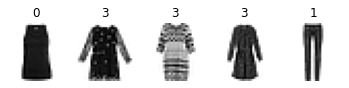

In [103]:
for X, y in dumm_set.take(1):
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X[i].numpy(), cmap="binary")
        plt.axis("off")
        plt.title(str(y[i].numpy()))

In [104]:
train_set = tfrecord_reader_dataset("/content/data/train/batch_*",
                                    shuffle_buffer_size=20000,
                                    batch_size=32)
valid_set = tfrecord_reader_dataset("/content/data/valid/batch_*",
                                    shuffle_buffer_size=20000,
                                    batch_size=32)
test_set = tfrecord_reader_dataset("/content/data/test/batch_*",
                                   shuffle_buffer_size=15000,
                                   batch_size=32)

In [105]:
def get_run_logdir(model_name):
    import time
    root = "/content/"
    log_dir = "log"
    os.makedirs(root + log_dir, exist_ok=True)
    root_logdir = root + log_dir
    run_id = time.strftime("run_%Y_%m_%d--%H_%M_%S")
    return os.path.join(root_logdir, model_name, run_id)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("data_api_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir("data_api_model"))
callbacks = [early_stopping_cb, checkpoint_cb, tensorboard_cb]

In [106]:
class StandardizationLayer(keras.layers.Layer):

    def  adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)

    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

In [107]:
standardization = StandardizationLayer(input_shape=[28, 28])

sample_image_batches = train_set.take(100).map(lambda image, label: image)
sample_images = np.concatenate(list(sample_image_batches.as_numpy_iterator()),
                                axis=0).astype(np.float32)
print(sample_images.shape)
standardization.adapt(sample_images)

(3200, 28, 28)


In [108]:
model = keras.models.Sequential([
    standardization,
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=2e-4),
              metrics=["accuracy"])

In [109]:
model.fit(train_set, epochs=100,
          validation_data=valid_set, callbacks=callbacks)

Epoch 1/100
15000/15000 [==============================] - 133s 9ms/step - loss: 3321.8354 - accuracy: 0.8720 - val_loss: 1681.3505 - val_accuracy: 0.8836
Epoch 2/100
15000/15000 [==============================] - 138s 9ms/step - loss: 813.5439 - accuracy: 0.9434 - val_loss: 1472.0563 - val_accuracy: 0.8832
Epoch 3/100
15000/15000 [==============================] - 123s 8ms/step - loss: 338.9097 - accuracy: 0.9682 - val_loss: 522.1448 - val_accuracy: 0.8882
Epoch 4/100
15000/15000 [==============================] - 125s 8ms/step - loss: 163.0289 - accuracy: 0.9823 - val_loss: 185.8163 - val_accuracy: 0.8894
Epoch 5/100
15000/15000 [==============================] - 125s 8ms/step - loss: 101.6697 - accuracy: 0.9894 - val_loss: 264.2598 - val_accuracy: 0.8858
Epoch 6/100
15000/15000 [==============================] - 123s 8ms/step - loss: 53.5581 - accuracy: 0.9925 - val_loss: 107.0550 - val_accuracy: 0.8892
Epoch 7/100
15000/15000 [==============================] - 130s 9ms/step - loss:

#### 10.

In [3]:
import urllib
import requests
import os
import tarfile
import zipfile
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
MOVIES_PATH = os.path.join("datasets", "imbd_reviews")
MOVIES_URL = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

def fetch_imdb_data(movies_url=MOVIES_URL, movies_path=MOVIES_PATH):
    if not os.path.isdir(movies_path):
        os.makedirs(movies_path)
    targz_path = os.path.join(movies_path, "imdb_reviews.tar.gz")
    response = requests.get(MOVIES_URL, stream=True)
    if response.status_code == 200:
        with open(targz_path, 'wb') as f:
            f.write(response.raw.read())
    
    return targz_path

In [5]:
targz_path = fetch_imdb_data()

In [6]:
EXTRACT_PATH = "/content/datasets/imbd_reviews"

my_tar = tarfile.open(targz_path)
my_tar.extractall(EXTRACT_PATH)
my_tar.close()

In [7]:
train_filepaths = ["/content/datasets/imbd_reviews/aclImdb/train/neg/*", "/content/datasets/imbd_reviews/aclImdb/train/pos/*"]
test_filepaths = ["/content/datasets/imbd_reviews/aclImdb/test/neg/*", "/content/datasets/imbd_reviews/aclImdb/test/pos/*"]

In [8]:
train_filepaths_dataset = tf.data.Dataset.list_files(train_filepaths)
test_filepaths_dataset = tf.data.Dataset.list_files(test_filepaths)

In [9]:
print(len(train_filepaths_dataset))
print(len(test_filepaths_dataset))

25000
25000


In [10]:
valid_filepaths_dataset, test_filepaths_dataset = test_filepaths_dataset.batch(15000)

In [11]:
print(len(valid_filepaths_dataset))
print(len(test_filepaths_dataset))

15000
10000


In [12]:
for item in train_filepaths_dataset.take(5):
    print(item.numpy())

b'/content/datasets/imbd_reviews/aclImdb/train/neg/11954_1.txt'
b'/content/datasets/imbd_reviews/aclImdb/train/pos/1640_10.txt'
b'/content/datasets/imbd_reviews/aclImdb/train/neg/8198_4.txt'
b'/content/datasets/imbd_reviews/aclImdb/train/neg/4844_2.txt'
b'/content/datasets/imbd_reviews/aclImdb/train/neg/5872_2.txt'


In [13]:
def review_reader_dataset(filepaths, repeat=1, n_readers=5, n_read_threads=None,
                       shuffle_buffer_size=None, n_parse_threads=5, batch_size=32):
    filepath_dataset = tf.data.Dataset.list_files(filepaths)
    review_dataset = filepath_dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath),
        cycle_length=n_readers,
        num_parallel_calls=n_parse_threads
    )
    
    ratings = tf.constant([], dtype=tf.int32)
    for filepath in filepath_dataset:
        file = os.path.basename(filepath.numpy())
        print(file)
        film_rating = np.int32(file.decode("utf-8")[-5])
        print(film_rating)
        ratings = tf.stack([ratings, tf.constant(film_rating, dtype=tf.int32)])
        
    print(ratings)
    print(asdadrating_dataset)       

    if shuffle_buffer_size:
        review_dataset = review_dataset.shuffle(shuffle_buffer_size).repeat(repeat)

    return dataset.batch(batch_size).prefetch(10)

In [ ]:
train_set = review_reader_dataset(train_filepaths)
valid_set = review_reader_dataset(valid_filepaths)
test_set = review_reader_dataset(test_filepaths)

I was not able to extract rating from the file paths, even after trying various methods. The reason being if I try to extract rating using .map() or .interleave(), then instead of "EagerTensor", "Tensor" object is passed to the function being called. And, there is no way of extracting value present in "Tensor" object. And, If I try to write a "for-loop" in "review_reader_dataset" function, then, the due to .()interleave, the records having been shuffled and using "tf.data.Dataset.zip()", we not match the reviews with the right film.